In [1]:
#importing libraries for web scrapping
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the Url
Url = urlopen('https://www.flipkart.com/search?q=ps%205%20games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off')
print(Url)
WebData = Url.read()
print(WebData)

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.104e9a.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" 

In [3]:
soup1 = bs(WebData)

In [4]:
pages_link = soup1.find_all('a',class_='ge-49M')
page_link = 'https://www.flipkart.com/search?q=ps+5+games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page='

for i in range(2,7):
    Url = page_link+str(i)
    page_data = urlopen(Url)
    WebData1 = page_data.read()
    WebData+=WebData1

In [5]:
soupdata = bs(WebData,'html.parser')
soupdata

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.104e9a.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel

In [6]:
#checking directory of soupdata
dir(soupdata)

['ASCII_SPACES',
 'DEFAULT_BUILDER_FEATURES',
 'NO_PARSER_SPECIFIED_WARNING',
 'ROOT_TAG_NAME',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_check_markup_is_url',
 '_decode_markup',
 '_feed',
 '_find_all',
 '_find_one',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_linkage_fixer',
 '_most_recent_element',
 '_namespaces',
 '_popToTag',
 '_should_pretty_print',
 'append',
 'attrs',
 'builder',
 'can_be_empty_element',
 'cdata_list_attributes',
 'childGenerator'

In [7]:
Containers = soupdata.find_all('div',class_='_4ddWXP')
print(type(Containers),len(Containers))

<class 'bs4.element.ResultSet'> 200


In [25]:
#finding data of first container
#Containers[0]

In [9]:
#print(Containers[0].prettify())

In [10]:
f = open('C:\\Users\\Faisal\\OneDrive\\Desktop\\Amazon\\PS_5_Games.csv','wb')
f.write('Product_Name,Stars,Current_Price,Discount,MRP,Ratings,Delivery,ImageUrl\n'.encode())

for items in Containers:
    #finding all product name
    product = items.find('a',class_='s1Q9rs')
    Product_Name = product.text.strip().replace(',','')
    
    #finding stars of all product
    Stars = items.find('div',class_='_3LWZlK')
    try:
        Stars = Stars.text
    except:
        Stars = 0
    
    
    #finding price of all product
    Current_Price = items.find('div',class_='_30jeq3').text.replace(',','').replace('₹','')
   
    
    #finding discount on all product
    Discount = items.find('div',class_='_3Ay6Sb')
    try:
        Discount = Discount.text
    except:
        Discount = '0% off'
   

    
    #finding MRP of all product
    MRP = items.find('div',class_='_3I9_wc')
    try:
        MRP = MRP.text.replace(',','').replace('₹','')
    except:
        MRP = 0
    
    
    
    #finding ratings on all product
    Ratings = items.find('span',class_='_2_R_DZ')
    try:
        Ratings = Ratings.text.strip('( )')
    except:
        Ratings = 0
    
    
    
    #finding delivery options of all product
    Delivery = items.find('div',class_='_2Tpdn3').text.strip()

    
   
    #finding all images
    Image = items.img
    ImageUrl = Image.get('src')
    
    
 
      
    f.write(f'{Product_Name},{Stars},{Current_Price},{Discount},{MRP},{Ratings},{Delivery},{ImageUrl}\n'.encode())
    print(Product_Name,Stars,Current_Price,Discount,MRP,Ratings,Delivery,ImageUrl)
  
    print('\n')
f.close()

Horizon Forbidden West 4.5 2899 42% off 4999 156 Free delivery https://rukminim1.flixcart.com/image/612/612/ku1k4280/physical-game/d/f/d/no-standard-edition-horizon-forbidden-west-full-game-ps5-original-imag799yyzwxj2b5.jpeg?q=70


PS5 - Uncharted : Legacy Of Thieves collection 4.7 1599 46% off 2999 66 Free delivery https://rukminim1.flixcart.com/image/612/612/kwwfte80/physical-game/e/f/u/no-standard-edition-ps5-uncharted-legacy-of-thieves-collection-original-imag9h7sgfnyqqrx.jpeg?q=70


Marvel’s Spider-Man: Miles Morales (Ultimate Edition) 4.7 4495 10% off 4999 215 Free delivery https://rukminim1.flixcart.com/image/612/612/kj7gwi80/physical-game/z/x/m/ultimate-edition-marvel-s-spider-man-miles-morales-full-game-ps5-original-imafytxkkvhbeqgw.jpeg?q=70


Gran Turismo 7 (Standard) 4.5 2918 41% off 4999 98 Free delivery https://rukminim1.flixcart.com/image/612/612/kwb07m80/physical-game/t/e/p/yes-standard-edition-ps5-gran-turismo-7-standard-ed-full-game-original-imag9yd5uzdbqp5c.jpeg?q=70

AttributeError: 'NoneType' object has no attribute 'text'

In [11]:
#opening file in dataframe
df=pd.read_csv('C:\\Users\\Faisal\\OneDrive\\Desktop\\Amazon\\PS_5_Games.csv',error_bad_lines=False)

In [12]:
df

Product_Name  Stars  Current_Price  \
0                               Horizon Forbidden West    4.5           2899   
1       PS5 - Uncharted : Legacy Of Thieves collection    4.7           1599   
2    Marvel’s Spider-Man: Miles Morales (Ultimate E...    4.7           4495   
3                            Gran Turismo 7 (Standard)    4.5           2918   
4                     Call Of Duty : Modern Warfare II    0.0           5955   
..                                                 ...    ...            ...   
100  Clubics PSP Video Game 32 Bit Many Different H...    0.0           3290   
101  Clubics 16 Bit Super Mini MD - HD TV Video Gam...    0.0           2099   
102           Death Stranding (Director's Cut Edition)    4.8           1820   
103        PS5 Fortnite: Minty Legends Pack (Standard)    5.0           1990   
104  PS4 Resident Evil Village (Free PS5 Upgrade) (...    0.0           2790   

    Discount   MRP  Ratings       Delivery  \
0    42% off  4999      156  Free delivery   
1    46% off  2999       66  Free delivery   
2    10% off  4999      215  Free delivery   
3    41% off  4999       98  Free delivery   
4    14% off  6999        0  Free delivery   
..       ...   ...      ...            ...   
100  34% off  4999        0  Free delivery   
101  30% off  2999        0  Free delivery   
102  39% off  2999        8  Free delivery   
103  43% off  3499        3  Free delivery   
104  44% off  4999        0  Free delivery   

                                              ImageUrl  
0    https://rukminim1.flixcart.com/image/612/612/k...  
1    https://rukminim1.flixcart.com/image/612/612/k...  
2    https://rukminim1.flixcart.com/image/612/612/k...  
3    https://rukminim1.flixcart.com/image/612/612/k...  
4    https://rukminim1.flixcart.com/image/612/612/x...  
..                                                 ...  
100  https://rukminim1.flixcart.com/image/612/612/k...  
101  https://rukminim1.flixcart.com/image/612/612/k...  
102  https://rukminim1.flixcart.com/image/612/612/k...  
103  https://rukminim1.flixcart.com/image/612/612/k...  
104  https://rukminim1.flixcart.com/image/612/612/k...  

[105 rows x 8 columns]

In [13]:
df.head()

Product_Name  Stars  Current_Price  \
0                             Horizon Forbidden West    4.5           2899   
1     PS5 - Uncharted : Legacy Of Thieves collection    4.7           1599   
2  Marvel’s Spider-Man: Miles Morales (Ultimate E...    4.7           4495   
3                          Gran Turismo 7 (Standard)    4.5           2918   
4                   Call Of Duty : Modern Warfare II    0.0           5955   

  Discount   MRP  Ratings       Delivery  \
0  42% off  4999      156  Free delivery   
1  46% off  2999       66  Free delivery   
2  10% off  4999      215  Free delivery   
3  41% off  4999       98  Free delivery   
4  14% off  6999        0  Free delivery   

                                            ImageUrl  
0  https://rukminim1.flixcart.com/image/612/612/k...  
1  https://rukminim1.flixcart.com/image/612/612/k...  
2  https://rukminim1.flixcart.com/image/612/612/k...  
3  https://rukminim1.flixcart.com/image/612/612/k...  
4  https://rukminim1.flixcart.com/image/612/612/x...

In [14]:
#finding count of columns and rows
df.shape

(105, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_Name   105 non-null    object 
 1   Stars          105 non-null    float64
 2   Current_Price  105 non-null    int64  
 3   Discount       105 non-null    object 
 4   MRP            105 non-null    int64  
 5   Ratings        105 non-null    int64  
 6   Delivery       105 non-null    object 
 7   ImageUrl       105 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.7+ KB


In [16]:
#finding the product having highest ratings
df[df['Ratings']==max(df['Ratings'])]

Product_Name  Stars  Current_Price Discount   MRP  Ratings       Delivery  \
96    Far Cry 5    4.4            999  50% off  1999      949  Free delivery   

                                             ImageUrl  
96  https://rukminim1.flixcart.com/image/612/612/j...

In [17]:
#finding the top 5 product having highest ratings
top5rated = df.sort_values(by = 'Ratings',ascending = False).head(5)
top5rated

Product_Name  Stars  Current_Price  \
96                                          Far Cry 5    4.4            999   
2   Marvel’s Spider-Man: Miles Morales (Ultimate E...    4.7           4495   
12         Ghost of Tsushima (Director's Cut Edition)    4.6           3199   
0                              Horizon Forbidden West    4.5           2899   
13                 Marvel’s Spider-Man: Miles Morales    4.3           2255   

   Discount   MRP  Ratings       Delivery  \
96  50% off  1999      949  Free delivery   
2   10% off  4999      215  Free delivery   
12  36% off  4999      168  Free delivery   
0   42% off  4999      156  Free delivery   
13  43% off  3999      137  Free delivery   

                                             ImageUrl  
96  https://rukminim1.flixcart.com/image/612/612/j...  
2   https://rukminim1.flixcart.com/image/612/612/k...  
12  https://rukminim1.flixcart.com/image/612/612/k...  
0   https://rukminim1.flixcart.com/image/612/612/k...  
13  https://rukminim1.flixcart.com/image/612/612/k...

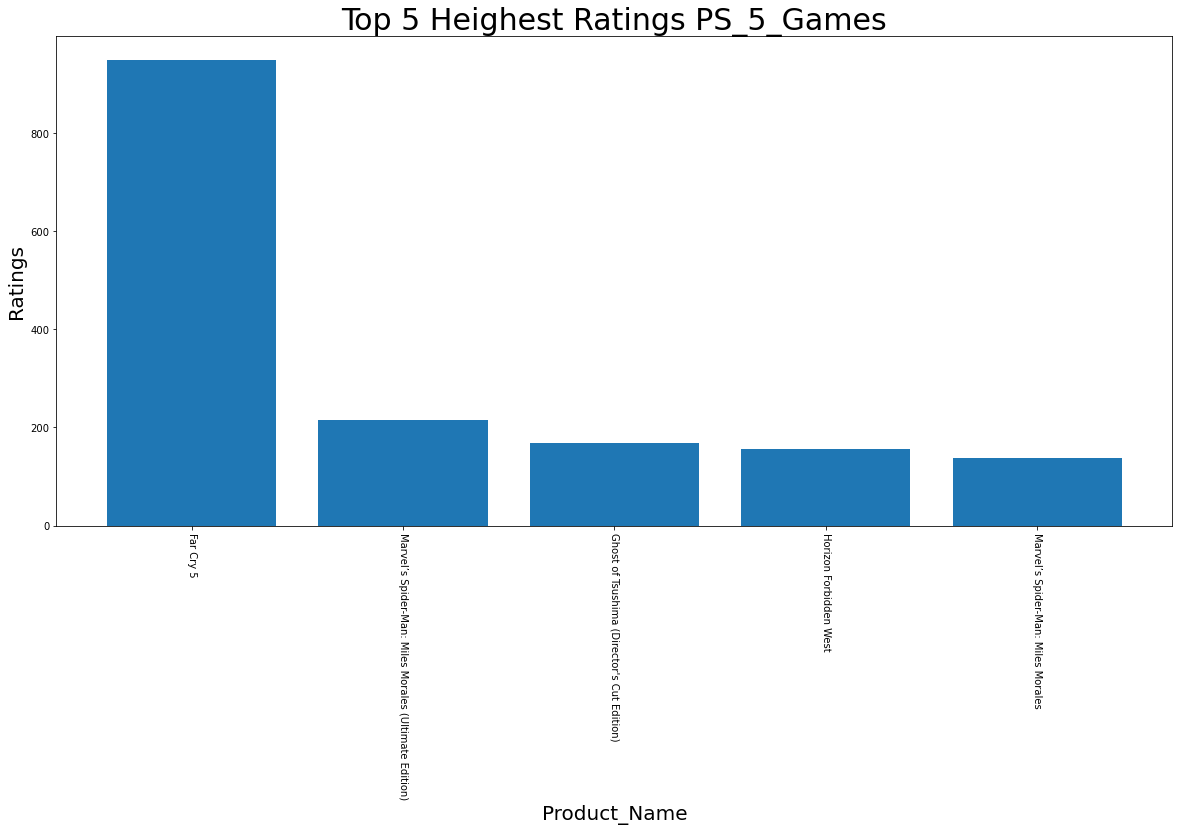

In [18]:
plt.figure(figsize=(20,9))
plt.bar(x=top5rated['Product_Name'],height=top5rated['Ratings'])
plt.title('Top 5 Heighest Ratings PS_5_Games',fontsize=30)
plt.xlabel('Product_Name',fontsize=20)
plt.ylabel('Ratings',fontsize=20)
plt.xticks(rotation = 270)
plt.show()

In [19]:
#finding most affordable PS_5_Games
top5currentPrice = df.sort_values(by='Current_Price').head(10)
top5currentPrice

Product_Name  Stars  Current_Price  \
85  Grand Theft Auto V: Criminal Enterprise Starte...    3.1            199   
98  Techglow Tekken 5 FULL GAME PLAYSTATION 2 in d...    2.3            540   
42                        PS5 - Destruction All Stars    4.0            765   
92  GTA FIVE GTA 5 PS4 GAME GRAND THEFT AUTO (NO C...    0.0            899   
89    Metal Gear Solid V: The Phantom Pain PS4 (2015)    0.0            969   
96                                          Far Cry 5    4.4            999   
95  Clubics V8 Best Wireless Bluetooth Gaming cont...    0.0           1299   
26                             PS5 FIFA 22 (Standard)    4.3           1439   
76                           Hades (Game of the Year)    0.0           1442   
99                Battlefield V 5 (Firestorm Edition)    4.5           1469   

   Discount   MRP  Ratings       Delivery  \
85  75% off   799        9  Free delivery   
98  55% off  1200        3     Bank Offer   
42  48% off  1499        4  Free delivery   
92  70% off  2999        0  Free delivery   
89  51% off  1999        0  Free delivery   
96  50% off  1999      949  Free delivery   
95  35% off  1999        0  Free delivery   
26  32% off  2124       78  Free delivery   
76  42% off  2499        0  Free delivery   
99  26% off  1999        6  Free delivery   

                                             ImageUrl  
85  https://rukminim1.flixcart.com/image/612/612/k...  
98  https://rukminim1.flixcart.com/image/612/612/k...  
42  https://rukminim1.flixcart.com/image/612/612/k...  
92  https://rukminim1.flixcart.com/image/612/612/l...  
89  https://rukminim1.flixcart.com/image/612/612/k...  
96  https://rukminim1.flixcart.com/image/612/612/j...  
95  https://rukminim1.flixcart.com/image/612/612/k...  
26  https://rukminim1.flixcart.com/image/612/612/k...  
76  https://rukminim1.flixcart.com/image/612/612/k...  
99  https://rukminim1.flixcart.com/image/612/612/k...

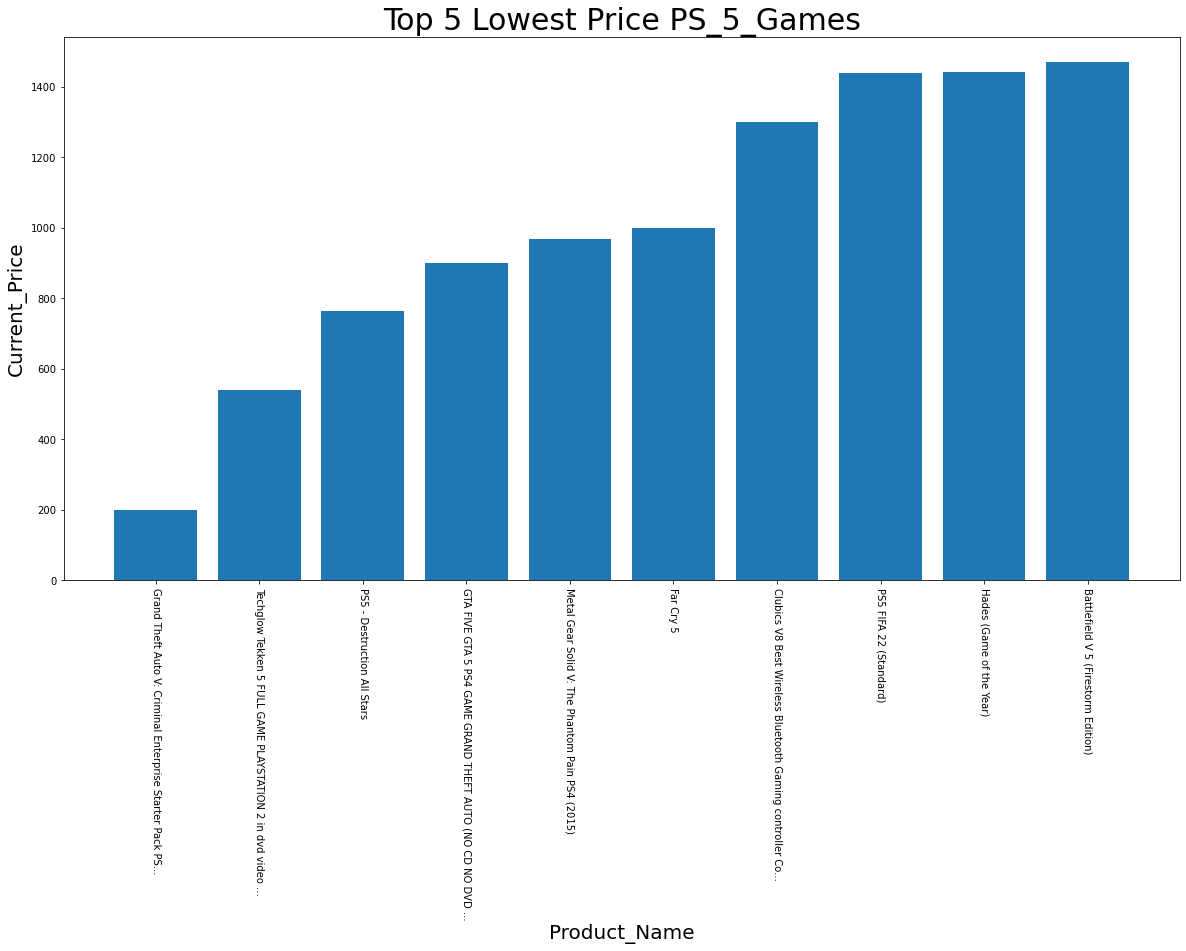

In [20]:
plt.figure(figsize=(20,10))
plt.bar(x=top5currentPrice['Product_Name'],height=top5currentPrice['Current_Price'])
plt.title('Top 5 Lowest Price PS_5_Games',fontsize=30)
plt.xlabel('Product_Name',fontsize=20)
plt.ylabel('Current_Price',fontsize=20)
plt.xticks(rotation=270)
plt.show()

In [21]:
midrange = df[(df['Current_Price']<1000) & (df['Current_Price']>100)]
midrange.sort_values(by='Ratings').head()

Product_Name  Stars  Current_Price  \
89    Metal Gear Solid V: The Phantom Pain PS4 (2015)    0.0            969   
92  GTA FIVE GTA 5 PS4 GAME GRAND THEFT AUTO (NO C...    0.0            899   
98  Techglow Tekken 5 FULL GAME PLAYSTATION 2 in d...    2.3            540   
42                        PS5 - Destruction All Stars    4.0            765   
85  Grand Theft Auto V: Criminal Enterprise Starte...    3.1            199   

   Discount   MRP  Ratings       Delivery  \
89  51% off  1999        0  Free delivery   
92  70% off  2999        0  Free delivery   
98  55% off  1200        3     Bank Offer   
42  48% off  1499        4  Free delivery   
85  75% off   799        9  Free delivery   

                                             ImageUrl  
89  https://rukminim1.flixcart.com/image/612/612/k...  
92  https://rukminim1.flixcart.com/image/612/612/l...  
98  https://rukminim1.flixcart.com/image/612/612/k...  
42  https://rukminim1.flixcart.com/image/612/612/k...  
85  https://rukminim1.flixcart.com/image/612/612/k...

In [22]:
smalldf = df[['Product_Name','Current_Price','MRP']]
smalldf

Product_Name  Current_Price   MRP
0                               Horizon Forbidden West           2899  4999
1       PS5 - Uncharted : Legacy Of Thieves collection           1599  2999
2    Marvel’s Spider-Man: Miles Morales (Ultimate E...           4495  4999
3                            Gran Turismo 7 (Standard)           2918  4999
4                     Call Of Duty : Modern Warfare II           5955  6999
..                                                 ...            ...   ...
100  Clubics PSP Video Game 32 Bit Many Different H...           3290  4999
101  Clubics 16 Bit Super Mini MD - HD TV Video Gam...           2099  2999
102           Death Stranding (Director's Cut Edition)           1820  2999
103        PS5 Fortnite: Minty Legends Pack (Standard)           1990  3499
104  PS4 Resident Evil Village (Free PS5 Upgrade) (...           2790  4999

[105 rows x 3 columns]

In [23]:
pages_link = soupdata.find_all('a',class_='ge-49M')
domain = 'https://www.flipkart.com'

for i in pages_link:
    print(domain+i.get('href'))

https://www.flipkart.com/search?q=ps+5+games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1
https://www.flipkart.com/search?q=ps+5+games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=ps+5+games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=ps+5+games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
https://www.flipkart.com/search?q=ps+5+games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
https://www.flipkart.com/search?q=ps+5+games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1
https://www.flipkart.com/search?q=ps+5+games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=ps+5+games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://

In [24]:
pages_link = soupdata.find_all('a',class_='ge-49M')
domain = 'https://www.flipkart.com/search?q=ps+5+games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page='

for i in range(2,7):
    print(domain+str(i))

https://www.flipkart.com/search?q=ps+5+games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=ps+5+games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=ps+5+games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
https://www.flipkart.com/search?q=ps+5+games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
https://www.flipkart.com/search?q=ps+5+games&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=6
